In [ ]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
spark = SparkSession\
.builder.appName("Spark Cassandra").config("spark.cassandra.connection.host","172.17.0.3")\
.config("spark.cassandra.connection.port","9042")\
.config("spark.jars.packages", "com.datastax.spark:spark-cassandra-connector_2.12:3.1.0")\
.config("spark.sql.extensions","com.datastax.spark.connector.CassandraSparkExtensions")\
.getOrCreate()
keyspace = "desafio_final"
def loadData(table):
    df = spark.read \
        .format("org.apache.spark.sql.cassandra") \
        .option("keyspace", keyspace) \
        .option("table", table) \
        .load()
    return df


22/01/19 16:24:12 WARN Utils: Your hostname, edudev resolves to a loopback address: 127.0.0.1; using 192.168.1.35 instead (on interface wlan0)
22/01/19 16:24:12 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/edudev/.ivy2/cache
The jars for the packages stored in: /home/edudev/.ivy2/jars
com.datastax.spark#spark-cassandra-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-4e3be115-f058-4c81-ac5a-2b1f6303df99;1.0
	confs: [default]
	found com.datastax.spark#spark-cassandra-connector_2.12;3.1.0 in central
	found com.datastax.spark#spark-cassandra-connector-driver_2.12;3.1.0 in central
	found com.datastax.oss#java-driver-core-shaded;4.12.0 in central
	found com.datastax.oss#native-protocol;1.5.0 in central
	found com.datastax.oss#java-driver-shaded-guava;25.1-jre-graal-sub-1 in central
	found com.typesafe#config;1.4.1 in central
	found org.slf4j#slf4j-api;1.7.26 in central
	found io.dropwizard.metrics#metrics-core;4.1.18 in central
	found org.hdrhistogram#HdrHistogram;2.1.12 in central
	found org.reactivestreams#reactive-streams;1.0.3 in central
	found com.github.stephenc.jcip#jcip-annotations;1.0-1 in central
	

In [ ]:
total_exportacao = loadData('total_exportacao')
uf_exportacao = loadData('exportacao_estado')
pais_exportacao = loadData('exportacao_pais')
evoucao_pib = pd.read_csv("/home/edudev/Documents/trabalho_final/modules/csv/evolucao_do_pib.csv")

In [ ]:
uf_pandas = uf_exportacao.toPandas()
agrupando = uf_pandas.groupby('estado').sum()

In [ ]:
valor = uf_pandas.valor_estado.tolist()

In [ ]:
estado = uf_pandas.estado.tolist()

In [ ]:
pais_exportacao = pais_exportacao.toPandas()

In [ ]:
pib_agricola = loadData('pib_agricola')

In [ ]:
pib_agricola = pib_agricola.toPandas()

In [ ]:
pib_agricola_total = pib_agricola.sort_values('ano_pib')

In [ ]:
pib_ano = evoucao_pib[['Ano', 'Produto interno bruto em R$ do último ano - R$ (PIB REAL EM R$ DE 2020) Fonte: IBGE']]

In [ ]:
pib_ano = pib_ano[pib_ano['Ano'] >= 1996]

In [ ]:
pib_ano['Produto interno bruto em R$ do último ano - R$ (PIB REAL EM R$ DE 2020) Fonte: IBGE'] = pib_ano['Produto interno bruto em R$ do último ano - R$ (PIB REAL EM R$ DE 2020) Fonte: IBGE'].apply(lambda x: x.replace(',', '')).astype('float')

In [ ]:
lista_total = pib_agricola_total.total.tolist()

In [ ]:
lista_total_pib = pib_ano['Produto interno bruto em R$ do último ano - R$ (PIB REAL EM R$ DE 2020) Fonte: IBGE'].tolist()

In [ ]:
lista_prc = list(zip(lista_total, lista_total_pib))
    

In [ ]:
lista_prc

[(1267191906304.0, 4643132367480.07),
 (1172400111616.0, 4800759560250.37),
 (1127753711616.0, 4816990827601.35),
 (1123009167360.0, 4839531337267.2),
 (1216313425920.0, 5051887525656.03),
 (1185493811200.0, 5122103528732.39),
 (1258876305408.0, 5278505006249.9),
 (1298778161152.0, 5338723722062.77),
 (1219754983424.0, 5646232320513.25),
 (1111920082944.0, 5827032097421.23),
 (1155873898496.0, 6057898452028.0),
 (1118227791872.0, 6425605049579.94),
 (1122483830784.0, 6752937929471.98),
 (1068085608448.0, 6744441923230.93),
 (1148271198208.0, 7252178742210.89),
 (1186743713792.0, 7540411007904.06),
 (1136706715648.0, 7685275573365.35),
 (1091547037696.0, 7916204476067.99),
 (1039518990336.0, 7956098642936.9),
 (1070601863168.0, 7673994209707.05),
 (1177935675392.0, 7422600536001.16),
 (1108802666496.0, 7520791821487.14),
 (1140311982080.0, 7654937685398.82),
 (1108369997824.0, 7762960567051.58),
 (1376595738624.0, 7447858250246.4)]

In [ ]:
pronto = [x[0]/x[1] for x in lista_prc]

In [ ]:
new_pronto = [x*100 for x in pronto]

In [ ]:
new_pronto

[27.29174630426771,
 24.421137882499092,
 23.411996243670906,
 23.204915705621694,
 24.07641539410661,
 23.144667118694187,
 23.849106970959667,
 24.327502765964066,
 21.60298964306737,
 19.082099846954392,
 19.08044361669761,
 17.402684778223364,
 16.622155312358515,
 15.836530592235166,
 15.833465211282693,
 15.73844864090331,
 14.790708606304939,
 13.788767596844288,
 13.065687556034044,
 13.951038193562432,
 15.869581956873017,
 14.743163922289614,
 14.896424098331376,
 14.277671363271727,
 18.483108732345404]

In [ ]:
anos = pib_ano.Ano.tolist()

In [ ]:
df = pd.DataFrame(new_pronto, anos)

In [ ]:
df

,0,aumento
1996,27.291746,NaN
1997,24.421138,-2.870608
1998,23.411996,-1.009142
1999,23.204916,-0.207081
2000,24.076415,0.871500
2001,23.144667,-0.931748
2002,23.849107,0.704440
2003,24.327503,0.478396
2004,21.602990,-2.724513
2005,19.082100,-2.520890


In [ ]:
df['aumento'] = df.iloc[:, 0].diff()

In [ ]:
agronegocio = [
(1616874 *1000000),
(1505175 *1000000),
(1435570 *1000000), 
(1421945 *1000000), 
(1539513 *1000000),
(1538459 *1000000), 
(1591306 *1000000), 
(1627168 *1000000),
(1547103 *1000000), 
(1420506 *1000000), 
(1412271 *1000000), 
(1456450 *1000000),
(1526127 *1000000), 
(1441569 *1000000), 
(1555643 *1000000), 
(1564622 *1000000),
(1470846 *1000000), 
(1491316 *1000000), 
(1485433 *1000000), 
(1544899 *1000000),
(1655064 *1000000), 
(1560824 *1000000), 
(1539078 *1000000), 
(1591927 *1000000), 
(1978894 *1000000)]

In [ ]:
1.978894e+12

1978894000000.0

In [ ]:
agronegocio_calculo = list(zip(agronegocio, lista_total_pib))

In [ ]:
prc_agronegocio = [x[0]/x[1] for x in agronegocio_calculo]

In [ ]:
new_prc_agronegocio = [x*100 for x in prc_agronegocio]

In [ ]:
df_agroneogcio = pd.DataFrame(new_prc_agronegocio, anos)

In [ ]:
df_agroneogcio["aumento"] = df_agroneogcio.iloc[:, 0].diff()

In [ ]:
df_agroneogcio

,0,aumento
1996,34.822914,NaN
1997,31.352851,-3.470063
1998,29.802216,-1.550635
1999,29.381874,-0.420342
2000,30.474016,1.092142
2001,30.035687,-0.438328
2002,30.146907,0.111220
2003,30.478595,0.331688
2004,27.400626,-3.077969
2005,24.377865,-3.022761


In [ ]:
df_final = pd.DataFrame([anos, df.aumento, df_agroneogcio.aumento], columns=anos)

In [ ]:
df_final = df_final.T

In [ ]:
df_final.drop(0, axis=1, inplace=True)

In [ ]:
df_final

,1,2
1996,NaN,NaN
1997,-2.870608,-3.470063
1998,-1.009142,-1.550635
1999,-0.207081,-0.420342
2000,0.871500,1.092142
2001,-0.931748,-0.438328
2002,0.704440,0.111220
2003,0.478396,0.331688
2004,-2.724513,-3.077969
2005,-2.520890,-3.022761


In [ ]:
df_aumento_agro = df_final.iloc[:, 0].tolist()
df_aumento_agronegocio = df_final.iloc[:, 1].tolist()
anos = df_final.index

Text(0.5, 1.0, 'Crescimento do PIB: 1996-2020')

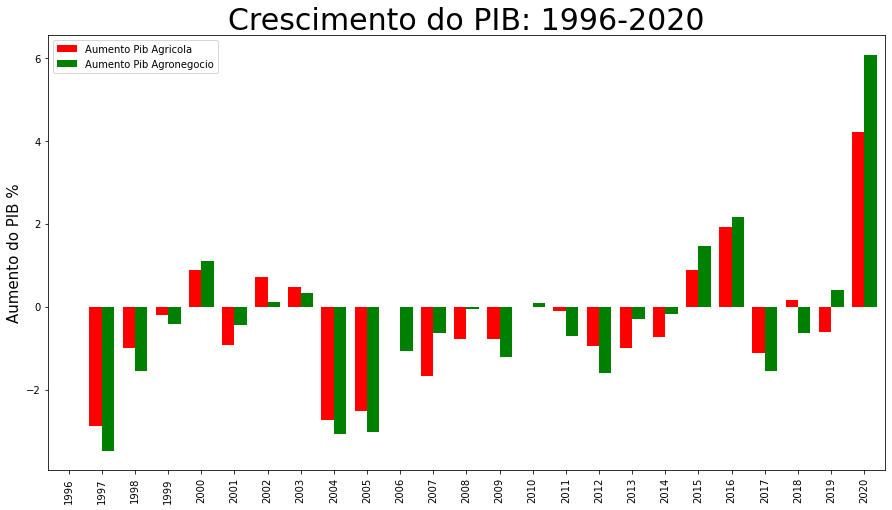

In [ ]:
fig, ax = plt.subplots()
df_final.plot(figsize=(15,8), kind='bar',legend=True, color=['red','green'], ax=ax, width = 0.75)
ax.legend(["Aumento Pib Agricola", "Aumento Pib Agronegocio"]);
ax.set_ylabel('Aumento do PIB %', fontsize=15)
ax.set_title('Crescimento do PIB: 1996-2020', fontsize=30)

In [ ]:
#GRAFICO DE PIZZA EXPORTACAO PAISES

In [ ]:
exportacao_paises = loadData('exportacao_pais')

In [ ]:
exportacao_paises = exportacao_paises.toPandas()

In [ ]:
exportacao_paises

,pais_exportacao,ano_exportacao,valor_exportacao
0,POLINESIA FRANC.,1997,532689.0
1,POLINESIA FRANC.,1998,619788.0
2,POLINESIA FRANC.,1999,316834.0
3,POLINESIA FRANC.,2000,219160.0
4,POLINESIA FRANC.,2001,202588.0
...,...,...,...
5645,"FEROE,ILHAS",2017,0.0
5646,"FEROE,ILHAS",2018,11247.0
5647,"FEROE,ILHAS",2019,192.0
5648,"FEROE,ILHAS",2020,140540.0


In [ ]:
exportacao_paises.shape

(5650, 3)

In [ ]:
exportacao_paises.groupby('pais_exportacao').sum().sort_values(by='valor_exportacao', ascending=False)

,valor_exportacao
pais_exportacao,
UNIÃO EUROPEIA 27 - UE 27,3.717719e+11
CHINA,3.364726e+11
ESTADOS UNIDOS,1.441930e+11
"RUSSIA,FED.DA",5.250603e+10
JAPAO,5.148357e+10
...,...
"COCOS-KEELING,I.",1.916600e+04
"HEARD E ILHAS MCDONALD, ILHA",8.312000e+03
S.PEDRO MIQUELON,2.295000e+03


In [ ]:
df_china = exportacao_paises[exportacao_paises['pais_exportacao'] == "CHINA"]

In [ ]:
df_uk = exportacao_paises[exportacao_paises['pais_exportacao'] == "UNIÃO EUROPEIA 27 - UE 27"]

In [ ]:
valores1 = df_china['valor_exportacao'].values

In [ ]:
valores2 = df_uk['valor_exportacao'].values

In [ ]:
anos = df_china.ano_exportacao.values

In [ ]:
df_comparacao = pd.DataFrame([valores1, valores2], columns=anos)

In [ ]:
df_comparacao = df_comparacao.reset_index()

In [ ]:
df_comparacao = df_comparacao.T

In [ ]:
df_comparacao

,0,1
index,0.000000e+00,1.000000e+00
1997,7.081203e+08,9.216552e+09
1998,5.903727e+08,7.924273e+09
1999,3.204169e+08,7.468263e+09
2000,5.615154e+08,7.497251e+09
2001,8.891784e+08,8.324472e+09
2002,1.356534e+09,8.334144e+09
2003,2.260792e+09,1.050010e+10
2004,2.962703e+09,1.270426e+10
2005,3.082241e+09,1.329330e+10


In [ ]:
df_comparacao.drop('index', axis=0, inplace=True)

In [ ]:
df_comparacao

,0,1
1997,7.081203e+08,9.216552e+09
1998,5.903727e+08,7.924273e+09
1999,3.204169e+08,7.468263e+09
2000,5.615154e+08,7.497251e+09
2001,8.891784e+08,8.324472e+09
2002,1.356534e+09,8.334144e+09
2003,2.260792e+09,1.050010e+10
2004,2.962703e+09,1.270426e+10
2005,3.082241e+09,1.329330e+10
2006,3.780995e+09,1.448689e+10


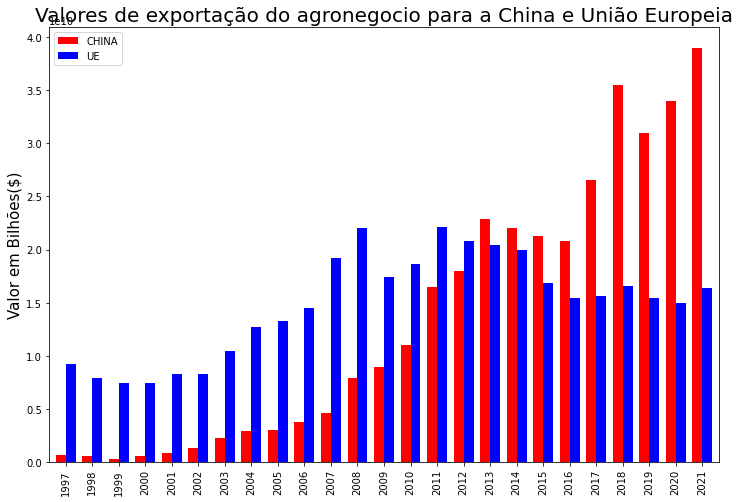

In [ ]:
fig, ax = plt.subplots()
df_comparacao.plot(kind='bar', figsize=(12,8), legend=True, color=['red','blue'], ax=ax, width = 0.75)
ax.set_ylabel('Valor em Bilhões($)', fontsize=15)
ax.set_title('Valores de exportação do agronegocio para a China e União Europeia', fontsize=20)
ax.legend(["CHINA", "UE"]);